In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sns.set(style='whitegrid')

In [18]:
df=pd.read_csv("netflix_titles.csv")

In [19]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [22]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [23]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [24]:
#Data Cleaning
#check null values

In [25]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [26]:
#we have null values in columns
#1director
#cast
#country
#date_added
#rating
#duration.

In [27]:
#filling missing values by Fillna

df['director']=df['director'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')
df['country']=df['country'].fillna('Unknown')

In [28]:
df.dropna(subset=['date_added'], inplace=True)  # Important date field

### Visualization

In [29]:
#Number of movies vs TV shows

<ipython-input-30-3782278461>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


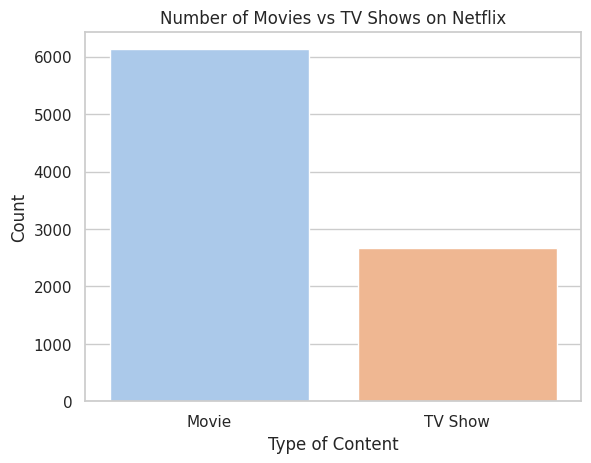

In [30]:
sns.set(style="whitegrid")
sns.countplot(data=df, x='type', palette='pastel')

plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()

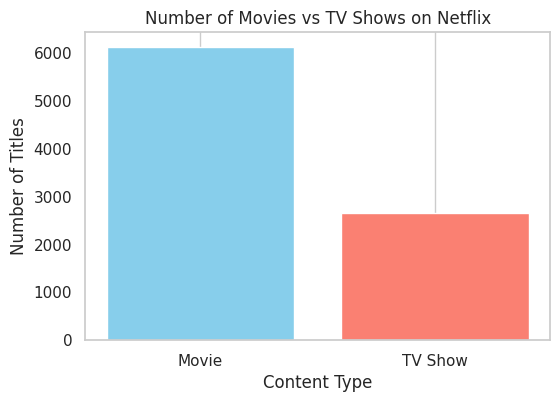

In [31]:
# Count values
type_counts = df['type'].value_counts()

# Bar chart
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'salmon'])
plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.show()

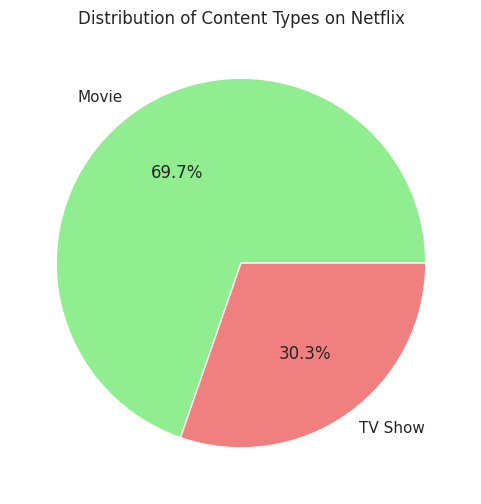

In [32]:
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Content Types on Netflix')
plt.show()

<Figure size 1200x700 with 0 Axes>

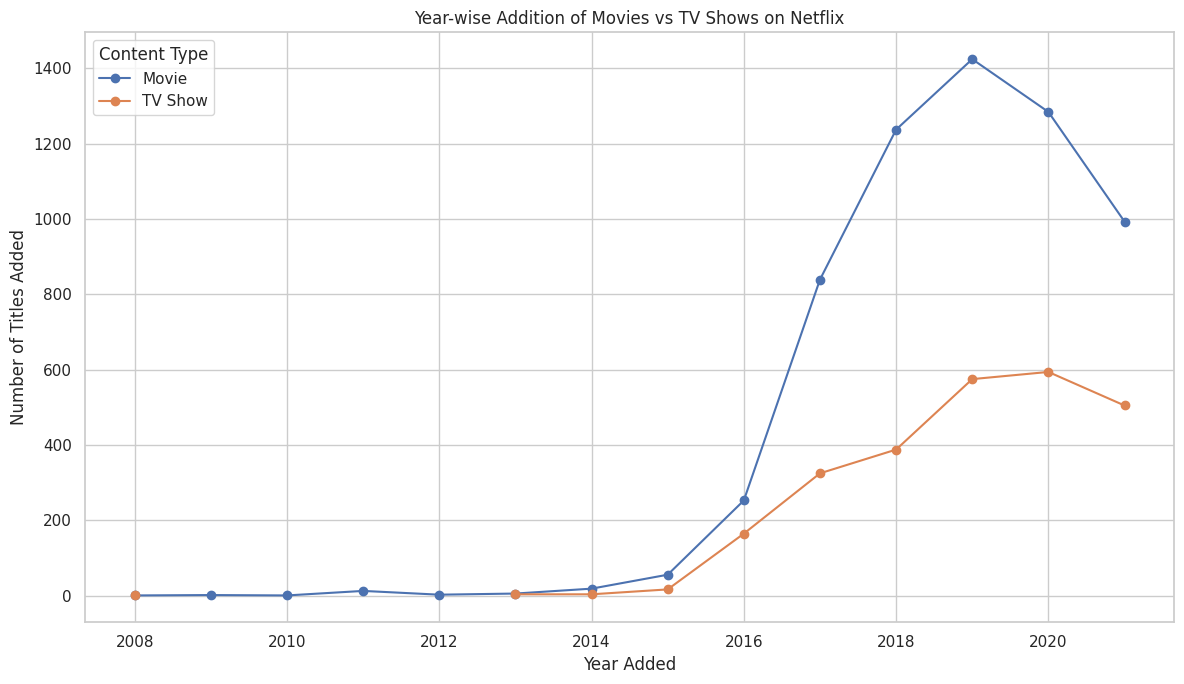

In [33]:
# Convert 'date_added' to datetime and extract year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
#In data cleaning, I often use errors='coerce' with pd.to_numeric() or pd.to_datetime() to safely handle invalid entries by converting them to NaN, which can later be filled or dropped.
df['year_added'] = df['date_added'].dt.year

# Group by type and year and count
type_by_year = df.groupby(['year_added', 'type']).size().unstack()

# Plot line chart
plt.figure(figsize=(12, 7))
type_by_year.plot(kind='line', marker='o', figsize=(12, 7))
plt.title('Year-wise Addition of Movies vs TV Shows on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()